# Preparing Time Series from Wide-Form Data
- Kevin Barnett
- 06/16/2023

In [98]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
from matplotlib.ticker import FuncFormatter
import datetime as dt
import missingno as miss

import seaborn as sns
import numpy as np
# import statsmodels.tsa.api as tsa

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")
plt.rcParams['figure.figsize'] = [12,3]

In [2]:
# Load data
df = pd.read_csv("C:\\Users\\hamma\\Documents\\GitHub\\Preparing-Time-Series-from-Wide-Form-Data\\City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month (1).csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22252 entries, 0 to 22251
Columns: 289 entries, RegionID to 2023-05-31
dtypes: float64(281), int64(2), object(6)
memory usage: 49.1+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"142,198.74","142,961.57",...,"704,328.11","700,966.92","698,366.39","695,208.39","690,292.91","687,068.31","687,011.73","691,699.55","699,834.08","711,531.28"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"217,870.61","218,178.62",...,"966,855.43","962,175.87","957,083.80","954,542.94","951,025.03","942,144.48","929,119.29","917,619.64","911,915.76","913,079.27"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"99,492.70","99,466.07",...,"270,044.58","270,253.29","270,222.22","270,208.89","269,444.88","267,972.85","266,390.57","265,656.72","265,460.61","265,732.63"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"123,335.34","123,369.81",...,"288,029.87","285,313.64","283,165.67","282,175.37","281,149.21","282,268.92","283,536.59","285,247.91","285,701.73","286,482.43"
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,"98,550.41","98,642.85",...,"271,476.02","271,119.43","270,570.04","270,013.55","268,853.69","267,682.79","266,707.66","266,888.67","266,902.75","267,059.89"


In [3]:
# Filter 4 largest cities
large_city = df['SizeRank'] <= 3
df = df[large_city]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"142,198.74","142,961.57",...,"704,328.11","700,966.92","698,366.39","695,208.39","690,292.91","687,068.31","687,011.73","691,699.55","699,834.08","711,531.28"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"217,870.61","218,178.62",...,"966,855.43","962,175.87","957,083.80","954,542.94","951,025.03","942,144.48","929,119.29","917,619.64","911,915.76","913,079.27"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"99,492.70","99,466.07",...,"270,044.58","270,253.29","270,222.22","270,208.89","269,444.88","267,972.85","266,390.57","265,656.72","265,460.61","265,732.63"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"123,335.34","123,369.81",...,"288,029.87","285,313.64","283,165.67","282,175.37","281,149.21","282,268.92","283,536.59","285,247.91","285,701.73","286,482.43"


In [4]:
# First 8 columns are id coluimns
id_vars = df.columns[:8]
id_vars

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'],
      dtype='object')

In [5]:
# Melt the  data 
long_df = pd.melt(df, id_vars=id_vars)
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,variable,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"142,198.74"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,"217,870.61"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,"99,492.70"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,"123,335.34"
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,"142,961.57"
...,...,...,...,...,...,...,...,...,...,...
1119,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2023-04-30,"285,701.73"
1120,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2023-05-31,"711,531.28"
1121,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2023-05-31,"913,079.27"
1122,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2023-05-31,"265,732.63"


In [6]:
# Set the var_name  as "Date" and the value_name as "Value"
long_df = pd.melt(df, id_vars=id_vars, var_name='Date', 
                      value_name="Value")
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"142,198.74"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,"217,870.61"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,"99,492.70"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,"123,335.34"
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,"142,961.57"
...,...,...,...,...,...,...,...,...,...,...
1119,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2023-04-30,"285,701.73"
1120,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2023-05-31,"711,531.28"
1121,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2023-05-31,"913,079.27"
1122,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2023-05-31,"265,732.63"


In [7]:
# Now make Date column datetime 
long_df['Date'] = pd.to_datetime(long_df["Date"])
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,"142,198.74"
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,"217,870.61"
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,"99,492.70"
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,"123,335.34"
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,"142,961.57"
...,...,...,...,...,...,...,...,...,...,...
1119,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2023-04-30,"285,701.73"
1120,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2023-05-31,"711,531.28"
1121,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2023-05-31,"913,079.27"
1122,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2023-05-31,"265,732.63"


In [8]:
# Set Date as index
long_df = long_df.set_index('Date')
long_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"142,198.74"
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"217,870.61"
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,"99,492.70"
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"123,335.34"
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"142,961.57"
...,...,...,...,...,...,...,...,...,...
2023-04-30,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,"285,701.73"
2023-05-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"711,531.28"
2023-05-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"913,079.27"


In [16]:
long_df.groupby('RegionName').resample("M").asfreq()

RegionID  SizeRank RegionName RegionType StateName  \
RegionName Date                                                             
Chicago    2000-01-31     17426         3    Chicago       city        IL   
           2000-02-29     17426         3    Chicago       city        IL   
           2000-03-31     17426         3    Chicago       city        IL   
           2000-04-30     17426         3    Chicago       city        IL   
           2000-05-31     17426         3    Chicago       city        IL   
...                         ...       ...        ...        ...       ...   
New York   2023-01-31      6181         0   New York       city        NY   
           2023-02-28      6181         0   New York       city        NY   
           2023-03-31      6181         0   New York       city        NY   
           2023-04-30      6181         0   New York       city        NY   
           2023-05-31      6181         0   New York       city        NY   

                      State                                  Metro  \
RegionName Date                                                      
Chicago    2000-01-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-02-29    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-03-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-04-30    IL     Chicago-Naperville-Elgin, IL-IN-WI   
           2000-05-31    IL     Chicago-Naperville-Elgin, IL-IN-WI   
...                     ...                                    ...   
New York   2023-01-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2023-02-28    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2023-03-31    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2023-04-30    NY  New York-Newark-Jersey City, NY-NJ-PA   
           2023-05-31    NY  New York-Newark-Jersey City, NY-NJ-PA   

                          CountyName      Value  
RegionName Date                                  
Chicago    2000-01-31    Cook County 123,335.34  
           2000-02-29    Cook County 123,369.81  
           2000-03-31    Cook County 123,683.64  
           2000-04-30    Cook County 124,479.40  
           2000-05-31    Cook County 125,543.64  
...                              ...        ...  
New York   2023-01-31  Queens County 687,068.31  
           2023-02-28  Queens County 687,011.73  
           2023-03-31  Queens County 691,699.55  
           2023-04-30  Queens County 699,834.08  
           2023-05-31  Queens County 711,531.28  

[1124 rows x 9 columns]

In [18]:
ts = long_df.groupby('RegionName').resample("M").asfreq()['Value']
ts

RegionName  Date      
Chicago     2000-01-31   123,335.34
            2000-02-29   123,369.81
            2000-03-31   123,683.64
            2000-04-30   124,479.40
            2000-05-31   125,543.64
                            ...    
New York    2023-01-31   687,068.31
            2023-02-28   687,011.73
            2023-03-31   691,699.55
            2023-04-30   699,834.08
            2023-05-31   711,531.28
Name: Value, Length: 1124, dtype: float64

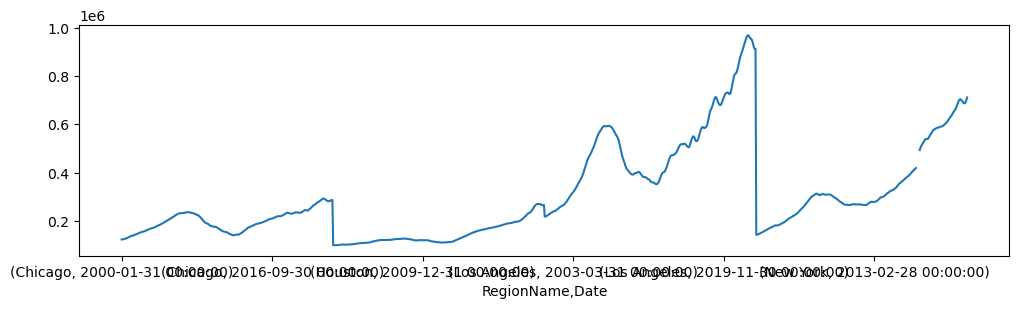

In [22]:
ts.plot();

In [25]:
# Unstack multi-index
ts_unstack = ts.unstack(0)
ts_unstack

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-31,"123,335.34","99,492.70","217,870.61","142,198.74"
2000-02-29,"123,369.81","99,466.07","218,178.62","142,961.57"
2000-03-31,"123,683.64","99,327.66","219,122.56","143,735.97"
2000-04-30,"124,479.40","99,283.17","221,000.78","145,233.51"
2000-05-31,"125,543.64","99,265.14","223,362.50","146,736.58"
...,...,...,...,...
2023-01-31,"282,268.92","267,972.85","942,144.48","687,068.31"
2023-02-28,"283,536.59","266,390.57","929,119.29","687,011.73"
2023-03-31,"285,247.91","265,656.72","917,619.64","691,699.55"


In [119]:
def thousands(x, pos):
    return '%0.0fK' % (x*1e-3)
formatter = FuncFormatter(thousands)

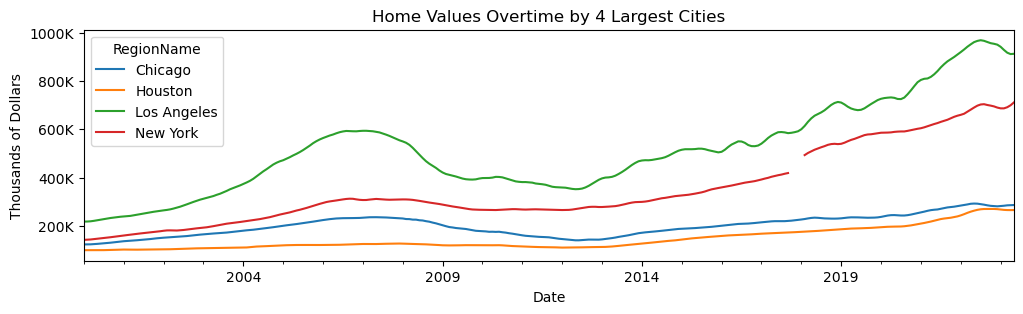

In [120]:
fig, ax = plt.subplots()

ts_unstack.plot(ax=ax)
ax.set_title('Home Values Overtime by 4 Largest Cities')
ax.set_ylabel('Thousands of Dollars')
ax.yaxis.set_major_formatter(formatter);

**Question 1: Which City had the highest Typical Home Value at the end of 2008? Which had the least?**

In [136]:
# Filter values in the end of 2008
ts_2008_end = ts.loc[pd.IndexSlice[:,'2008-12']
ts_2008_end

RegionName
Chicago       206,621.62
Houston       120,588.76
Los Angeles   429,837.79
New York      290,685.58
Name: Value, dtype: float64

> Los Angeles had the highest and Houston had the least typical home value at the end of 2008

In [142]:
# Filter values in November and December 2008
ts_month = ts.loc[pd.IndexSlice[:,'2008-11':'2008-12']]
ts_month

RegionName   Date      
Chicago      2008-11-30   210,609.69
             2008-12-31   206,621.62
Houston      2008-11-30   121,440.44
             2008-12-31   120,588.76
Los Angeles  2008-11-30   440,330.81
             2008-12-31   429,837.79
New York     2008-11-30   292,988.24
             2008-12-31   290,685.58
Name: Value, dtype: float64

In [145]:
# Get difference in home values
val_diff = ts_month.diff()
val_diff

RegionName   Date      
Chicago      2008-11-30           NaN
             2008-12-31     -3,988.07
Houston      2008-11-30    -85,181.18
             2008-12-31       -851.68
Los Angeles  2008-11-30    319,742.05
             2008-12-31    -10,493.02
New York     2008-11-30   -136,849.55
             2008-12-31     -2,302.67
Name: Value, dtype: float64

- Chicago Home Value Change: \\$-3,988.07
- Houston Home Value Change: \\$-851.68
- Los Angeles Home Value Change: \\$-10,493.02
- New York Home Value Change: \\$-2,302.67